In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
all_data = np.loadtxt("data_with_label_1-1.txt", delimiter=",")

In [3]:
new_data=all_data[:,[0, 1, 3]]

In [4]:
label=new_data[:,2]

In [5]:
def make_meshgrid(x, y, h=.01):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [6]:
def plot_contours(plt, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [7]:
pos_before = np.where(label== 1)[0]
neg_before = np.where(label == -1)[0]

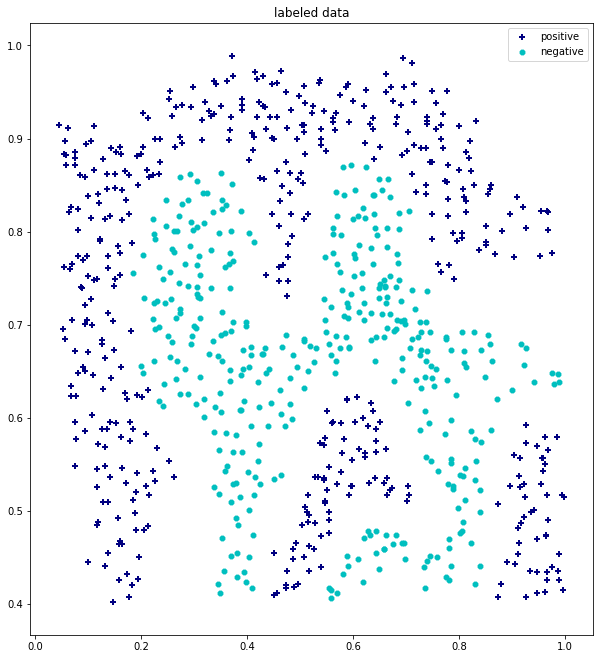

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(new_data[pos_before, 0], new_data[pos_before, 1], color='navy',
            marker='P', lw=0, label="positive", s=40)
plt.scatter(new_data[neg_before, 0], new_data[neg_before, 1], color='c',
            marker='8', lw=0, label="negative", s=40)

plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("labeled data")
plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()

In [9]:
rand_index=np.random.choice(863, 500, replace=True)

In [10]:
train_data=new_data[rand_index,0:2]

In [11]:
train_label=new_data[rand_index,2]

In [12]:
test_data=np.delete(new_data[:,0:2], rand_index,0)

In [13]:
test_label=np.delete(new_data[:,2], rand_index,0)

In [14]:
model1=svm.SVC(kernel='rbf', gamma=1000, C=1)

In [15]:
model1 = model1.fit(train_data, train_label)

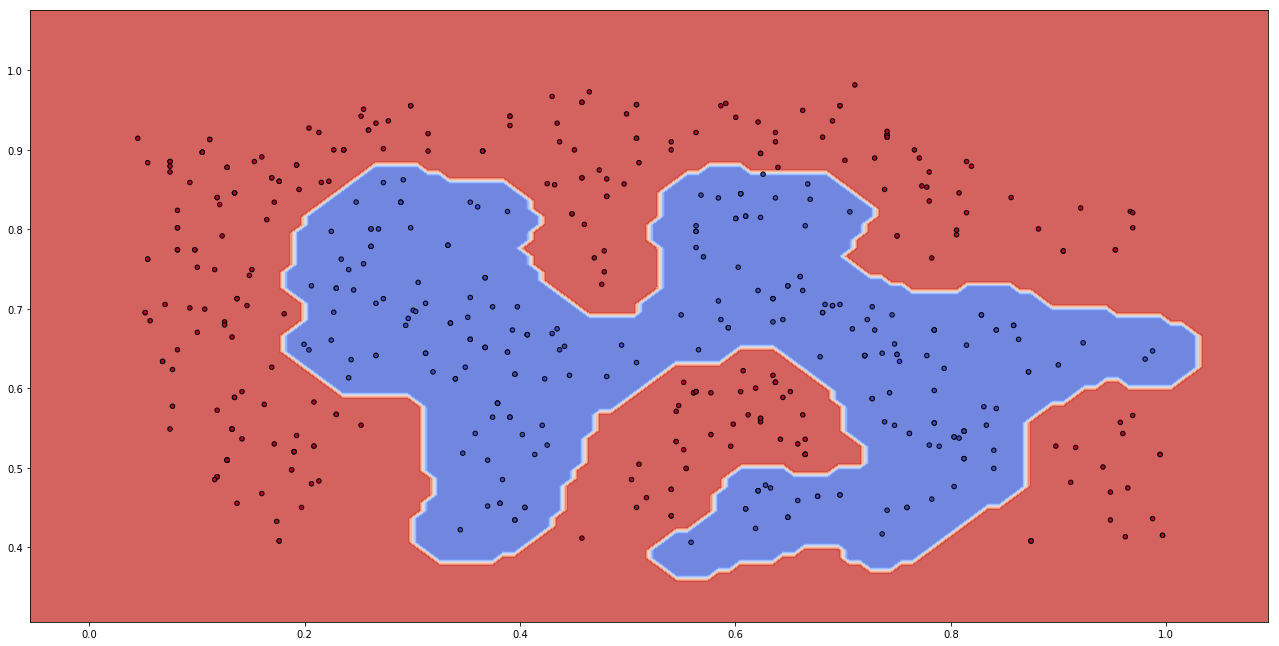

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 1, 1)

X1, X2 = train_data[:, 0], train_data[:, 1]
x1, x2 = make_meshgrid(X1, X2)
r=x1.shape[0]
c=x1.shape[1]
a1=np.zeros((r,c))
plot_contours(plt, model1, x1, x2, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X1, X2, c=train_label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)

plt.show()

In [17]:
pred=model1.predict(test_data)

In [18]:
np.mean(pred!=test_label)

0.01016260162601626